# Linear Regression example
출처: [텐서플로우 선형 회귀분석 코드 _ github](https://github.com/rickiepark/tfk-notebooks/blob/master/first-contact-with-tensorflow/chapter2_regression.py.ipynb)<br>
출처: [텐서플로우 선형 회귀분석 – First Contact with TensorFlow tensorflow블로그](텐서플로우 선형 회귀분석 – First Contact with TensorFlow)

# 선형 회귀분석 모델
# 선형 회귀분석 모델1_1
이 선형 회귀분석 모델은 모델을 만들기 위해 입력 데이터와 출력 값(label)을 사용했다는 점에서 감독(supervised)학습 알고리즘이다. 
## DATA
### 1. 데이터를 만든다
선형 회귀분석 모델을 만들기 앞서, 데이터를 만든다. 
**선형 회귀분석은 변수들 사이의 관계를 분석하는 데 사용하는 통계학적 방법이다.** 
<br>
선형 회귀분석은 독립변수 x_{i}, 상수항 b와 종속변수 사이의 관계를 모델화 하는 것이다.  <br>
* 두 변수 사이의 관계 : 단순회귀분석
* 여러개의 변수를 다루는 경우 : 다중회귀분석 <br>


<hr>
**[Data]**
* \\(y = W * x + b \\)
* \\(y = 0.1 * x + 0.3 \\) 관계를 가지는 데이터 생성


In [2]:
import numpy as np

In [ ]:
vectors_set2 = []
for i in range(12):
#     print(i)
    x2 = np.random.normal(0.0, 0.55)
    y2 = x2 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
#     print(x2)
#     print(y2)
    vectors_set2.append([x2, y2])
print(vectors_set2)

print("x2값: ", vectors_set2[0][0])
print("y2값: ", vectors_set2[0][1])

* x1은 평균값을 0으로 갖고, 표준편차가 0.55인 정규분포를 생성
* y1은 x1의 데이터를 이용해 기울기 0.1, y절편은 0.3방정식을 이용해 만든다. <br>
이때, y절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만든다. 

In [6]:
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

In [11]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]
print(x_data)
print("\n=====\n")
# print(y_data)
print(type(x_data))
print(type(y_data))

[-0.11591833628303656, 0.47940973436440865, -0.25309107606441517, 0.008262404473377692, -0.845189163499957, 0.8132376775802096, -0.44807967052012876, -0.37595429480876075, 0.05047671415846147, -0.2827352085640901, 0.10421071055548972, 1.3813618522828326, -0.19022163068814116, -0.3799647857386049, 0.5967069245573875, -0.5056140744927029, 0.32821093345526775, 0.33549473511298167, 0.029693968455569035, -0.4740729104136024, -0.01762684043750762, -0.02445069973121029, -0.7517665473132856, 0.06545800130426947, -0.8425419105252296, -0.4091710148033655, 0.3725423872031366, -0.4511852131185673, -0.2680411068027609, -0.045225306405780055, -0.6873104510573812, -0.5498670120870723, 0.46805246909967607, 0.59910537858606, 0.6182806225624528, 0.7788445214278129, -0.10500182411645906, -0.313855153947541, 0.03150988778606727, -0.3459656399762244, 0.514090254431057, 0.2001395781378516, 0.5340179047525504, 0.2835212223803845, 0.056716972058745097, -0.6596598275551044, 0.10881153222312057, -0.533336113787

### 2. 선형회귀분석 사용을 위한, 데이터 특징
1. 평균값 확인
2. 표준편차 확인
3. 정규분포인지 확인?

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y좌표에 x_data, y_data를 사용하여 붉은색 원으로 산포드를 그린다 <br>
참고: [matplotlib_plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

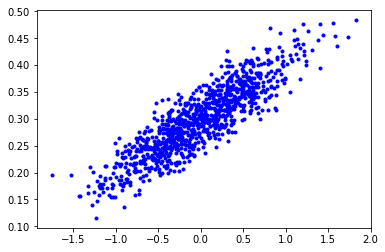

In [8]:
# plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_data, 'b.') # coror # shape type (ex: o, v, . )
plt.show()

### 3. 텐서플로우

In [4]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# -1 ~ 1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만든다. 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
# W = tf.Variable(tf.random_normal([1]), name='weight')

# 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [ ]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)

모든 변수를 초기화하고 세션을 시작한다.

In [ ]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

8번 반복하면서 train을 실행시킨다. 
<br>
반복마다 W, b값의 변화를 프린트하고, 그래프로 직선의 기울기의 변화를 살펴본다.

In [ ]:
for step in range(8):
    sess.run(train)
    print("step=",step, "weight:", sess.run(W), "\nbias:", sess.run(b), "cost:", sess.run(loss))
    
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    
    # x, y축 레이블링, 각 축의 최대, 최소값 범위를 지정
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.show()

## 선형 회귀분석 모델1_2

In [5]:
num_points = 1000
vectors_set3 = []
for i in range(num_points):
    x3 = np.random.normal(0.0, 0.55)
    y3 = x1 * 0.1 + 0.3 # + np.random.normal(0.0, 0.03)
    vectors_set3.append([x3, y3])

NameError: name 'x1' is not defined

In [ ]:
x_data3 = [v[0] for v in vectors_set]
y_data3 = [v[1] for v in vectors_set]

In [ ]:
print(x_data3)
print("\ny_data\n", y_data3)

In [ ]:
plt.plot(x_data3, y_data3, 'b.') # coror # shape type (ex: o, v, . )
plt.show()

In [ ]:
# -1 ~ 1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만든다. 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
# W = tf.Variable(tf.random_normal([1]), name='weight')

# 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서
b = tf.Variable(tf.zeros([1]))
y = W * x_data3 + b

loss = tf.reduce_mean(tf.square(y - y_data3))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for step in range(8):
    sess.run(train)
    print("step=",step, "weight:", sess.run(W), "\nbias:", sess.run(b), "cost:", sess.run(loss))
    
    # 산포도 그리기
    plt.plot(x_data3, y_data3, 'ro')
    
    # 직선 그리기
    plt.plot(x_data3, sess.run(W) * x_data3 + sess.run(b))
    
    # x, y축 레이블링, 각 축의 최대, 최소값 범위를 지정
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.show()

# 선형 회귀분석 모델1_3

In [ ]:
num_points = 1000
vectors_set4 = []
for i in range(num_points):
    x4 = np.random.normal(0.0, 0.55)
    y4 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set4.append([x4, y4])
x_data4 = [v[0] for v in vectors_set]
y_data4 = [v[1] for v in vectors_set]
plt.plot(x_data4, y_data4, 'r.')
plt.show()

In [ ]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = x_data3 * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_data4))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(8):
    sess.run(train)
    print("step=",step, "weight:", sess.run(W), "\nbias:", sess.run(b), "cost:", sess.run(cost))
     # 산포도 그리기
    plt.plot(x_data4, y_data4, 'r.')
    
    # 직선 그리기
    plt.plot(x_data4, sess.run(W) * x_data4 + sess.run(b))
    
    # x, y축 레이블링, 각 축의 최대, 최소값 범위를 지정
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.show()

모든 데이터에 레이블이 있는 것은 아니고, 이러한 경우에도 분석을 해야한다. 
이럴 때 클러스터링(clustering, 군집화)ㄹ는 비감독(supervised)학습 알고리즘을 사용할 수 있다. 클러스터링은 데이터 분석의 사전 작업으로 사용되기 좋아 널리 이용되는 방법이다. <br>
[tensorflow블로그_클러스터링](https://tensorflow.blog/3-%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-first-contact-with-tensorflow/)

# 선형 회귀분석모델2
참고: [Predicting house prices in Boston area](http://aqibsaeed.github.io/2016-07-07-TensorflowLR/) <br>
github주소: [aqibaeed/Tensor-ML](https://github.com/aqibsaeed/Tensorflow-ML/blob/master/Linear%20Regression.ipynb)<br>
### axis에 대한 이해
axis = 0 은 x축을 기준으로 여러 row를 한 개로 합치는 과정이다.
axis = 1은 y축을 row별로 존재하는 column들의 값을 합쳐 1개로 축소하는 과정이다. <br>
참고: [taewan.kim 블로그](http://taewan.kim/post/numpy_sum_axis/)

### reshape에 대한 이해
reshape 함수는 Python을 통해 머신러닝 혹은 딥러닝 코딩을 하다보면 꼭 나오는 numpy 내장함수이다. <br>
N-Dim tensor의 shape를 재설정해주고 싶은 상황에서 사용된다. 
<br>

[Kascia's blog_reshape에 대해서](http://kascia.tistory.com/5) <br>
[tutorial_example](https://www.tutorialspoint.com/numpy/numpy_reshape.htm)

### Numpy의 자료형
### 1. c_메서드
배열의 차원을 증가시킨 후 좌우로 연결한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다. 
<br>
[데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/)

### reshape
안에 값을 사용해서 배열 형태를 변경?? <br>
참고페이지: [reshape 차원 변경](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/)

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.node_ast_interactirity='all'

In [13]:
import numpy as np

In [18]:
a = np.arange(8)
print(a)
b = a.reshape(4, 2)
print(b)
c = a.reshape(2, 2, 2)
print(c)

[0 1 2 3 4 5 6 7]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


In [15]:
arr = np.zeros((64,64,3)) # 64 * 64 size image with RGB channels >> arr = getImage()
# print(arr)
# arr = getImage()
print(arr.shape)
b = arr.reshape(64*64, 3)
print(b.shape)
c = arr.reshape(16, 16, -1) # -1은 1차와 2차의 크기를 16과 16으로 맞추고 남은 나머지라는 뜻이다. 
print(c.shape)

(64, 64, 3)
(4096, 3)
(16, 16, 48)


In [59]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(type(a))
print(a.shape)
np.reshape(a, 6)
np.reshape(a, 6, order='F')
np.reshape(a, (3, -1))
np.reshape(a, (2, -1))

<class 'numpy.ndarray'>
(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

#### np.zeros()

In [5]:
dim = 3 # number of entries 
shp = (dim, 1) # shape tuple
x = np.zeros(shp)
print(x)

[[0.]
 [0.]
 [0.]]


### c_메소드

In [29]:
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]
print(np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])])

[[1 4]
 [2 5]
 [3 6]]


In [78]:
c = np.array([[1., 1., 4.], [1., 2., 5.], [1., 3., 6.], [5., 6., 7.], [5., 5., 5.]])
print(c)
print(c.shape)
x_inst = c.shape[0]
column = c.shape[1]
print(x_inst, column)

[[1. 1. 4.]
 [1. 2. 5.]
 [1. 3. 6.]
 [5. 6. 7.]
 [5. 5. 5.]]
(5, 3)
5 3


In [79]:
print(np.c_[np.ones(5), c])
print([5, 3+1])
print(np.reshape(np.c_[np.ones(5), c], [5, 4])) 

[[1. 1. 1. 4.]
 [1. 1. 2. 5.]
 [1. 1. 3. 6.]
 [1. 5. 6. 7.]
 [1. 5. 5. 5.]]
[5, 4]
[[1. 1. 1. 4.]
 [1. 1. 2. 5.]
 [1. 1. 3. 6.]
 [1. 5. 6. 7.]
 [1. 5. 5. 5.]]


In [80]:
c = np.array([[1., 1., 4.], [1., 2., 5.], [1., 3., 6.], [5., 6., 7.], [5., 5., 5.], [6., 6., 6.]])
print(c)
print(c.shape)
x_inst = c.shape[0]
column = c.shape[1]
print(x_inst, column)

[[1. 1. 4.]
 [1. 2. 5.]
 [1. 3. 6.]
 [5. 6. 7.]
 [5. 5. 5.]
 [6. 6. 6.]]
(6, 3)
6 3


In [81]:
print(np.reshape(np.c_[np.ones(6), c], [6, 4])) 

[[1. 1. 1. 4.]
 [1. 1. 2. 5.]
 [1. 1. 3. 6.]
 [1. 5. 6. 7.]
 [1. 5. 5. 5.]
 [1. 6. 6. 6.]]


In [83]:
print(np.c_[np.ones(6), c])
print([6, 3+1])

[[1. 1. 1. 4.]
 [1. 1. 2. 5.]
 [1. 1. 3. 6.]
 [1. 5. 6. 7.]
 [1. 5. 5. 5.]
 [1. 6. 6. 6.]]
[6, 4]


In [64]:
print(np.c_[np.ones(3), np.array([1, 2, 3]), np.array([4, 5, 6])])

[[1. 1. 4.]
 [1. 2. 5.]
 [1. 3. 6.]]


In [ ]:
np.reshape(np.c_[np.ones(3), np.array([1, 2, 3]), np.array([4, 5, 6])], [3, ])

### r_메소드

In [30]:
np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]
print(np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])])

[1 2 3 4 5 6]


### np.random.rand
참고페이지: [데이터 사이언스스쿨_ rand](https://datascienceschool.net/view-notebook/72af799212894d7c8931fc264b486eb3/) <br>
rand 명령은 0과 1사이의 값을 균일하게 생성한다.

In [87]:
c = np.random.rand(6) < 0.80
print(c)
d = np.random.rand(3) < 0.80
print(d)
e = np.random.rand(10) < 0.40
print(e)
f = np.random.rand(10) < 0.80
print(f)

[ True  True  True  True  True  True]
[ True  True  True]
[False  True False False False  True False False  True False]
[ True  True False False  True  True  True  True False  True]


### housing 예측

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np

from numpy import genfromtxt

from sklearn.datasets import load_boston

In [130]:
boston = datasets.load_boston()
# print("[boston]\n", boston)
# print("\n[data]\n", np.array(boston.data))
# print("\ntarget\n", boston.target)

features = np.array(boston.data)
labels = np.array(boston.target)

In [131]:
# features, labels = read_boston_data()
print(len(features))
print(features.shape)
print(len(labels))
print(labels.shape)
# print(labels) # 의미를 모르겠음

506
(506, 13)
506
(506,)


normalized

In [132]:
mu = np.mean(features, axis=0)
print("mean: ", mu)
sigma = np.std(features, axis=0)
print("sigma: ", sigma)

# normalized_features = (dataet - mu)/sigma 
normalized_features = (features - mu)/sigma
print("normalized: ", normalized_features)

mean:  [3.59376071e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
sigma:  [8.58828355e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]
normalized:  [[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [133]:
n_training_samples = features.shape[0]
print(n_training_samples)
n_dim = features.shape[1]
print(n_dim)
print(features.shape)

506
13
(506, 13)


In [134]:
f = np.reshape(np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim + 1])
l = np.reshape(labels, [n_training_samples, 1])
print(f)
print("======")
print(l)

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20

In [135]:
n_dim = f.shape[1]
print(n_dim)

14


In [136]:
rnd_indices = np.random.rand(len(f)) < 0.80

In [137]:
def read_dataset(filePath, delimiter=''):
    return genfromtxt(filePath, delimiter=delimiter )

In [138]:
def read_boston_data():
    boston = datasets.load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

In [139]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

In [140]:
def append_bias_reshape(features, labels):
    n_training_sample = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

In [146]:
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(414, 14)
(414, 1)
(92, 14)
(92, 1)


In [142]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
print(cost_history)

X = tf.placeholder(tf.float32, [None, n_dim])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.ones([n_dim, 1]))
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

[0.8]


In [143]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={X: train_x, Y: train_y})
    cost_history = np.append(cost_history, sess.run(cost, feed_dict={X: train_x, Y: train_y}))
    if epoch % 10 ==0:
        print(epoch, "Cost : ", cost_history)

0 Cost :  [  0.8        551.47528076]
10 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729]
20 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202]
30 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016]
40 Cost :  [  0.8        551.47528076 519.66040039 49

200 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


  20.71299744  20.71012306]
350 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.682056

460 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


580 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


680 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


770 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


830 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


880 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


940 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.68205643  48.61109543  47.5818367


  20.19788551  20.19773293]
990 Cost :  [  0.8        551.47528076 519.66040039 491.56054688 466.47564697
 443.85842896 423.27929688 404.40032959 386.95523071 370.73257446
 355.56445312 341.31646729 327.88024902 315.16790771 303.10760498
 291.64013672 280.71606445 270.29367065 260.33758545 250.81719971
 241.70584106 232.98007202 224.61903381 216.60374451 208.91714478
 201.54367065 194.46876526 187.67897034 181.16183472 174.90556335
 168.89900208 163.13179016 157.59384155 152.27583313 147.16867065
 142.26385498 137.55316162 133.02874756 128.6831665  124.50920105
 120.50000763 116.64899445 112.94985962 109.39659119 105.98331451
 102.70452881  99.55484009  96.52912903  93.6224823   90.83016968
  88.14763641  85.57059479  83.0947876   80.71626282  78.43108368
  76.23564148  74.12632751  72.09976196  70.15264893  68.2818222
  66.48433685  64.7572403   63.09770966  61.50314713  59.97093964
  58.49861908  57.08385086  55.72431183  54.41785049  53.16238403
  51.95586777  50.79637527  49.682056

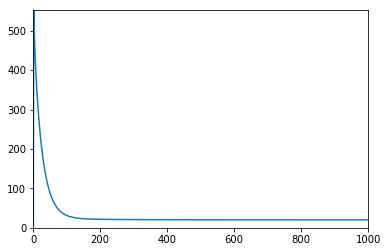

In [144]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

(92, 1)
(92, 1)
Tensor("Mean_6:0", shape=(), dtype=float64)
MSE: 32.4832


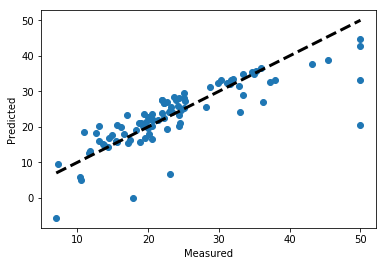

In [145]:
pred_y = sess.run(y_, feed_dict={X: test_x})
print(pred_y.shape)

mse = tf.reduce_mean(tf.square(pred_y - test_y))
print(test_y.shape)
print(mse)
print("MSE: %.4f" % sess.run(mse))

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()